# TAREFA 2
CIV 269 - 2018
Tarefa 2
Exercício:

1)	Considere a função f(x) = 1/x, no intervalo de 5 ≤ x ≤ 8

2)	Através da interpolação de Lagrange, transforme essa função em um polinômio de grau 1 e em outro de grau 2.

3)	Para cada um desses polinômios, calcule a integral da função no intervalo dado, considerando um e dois pontos de Gauss.


# ROTEIRO (E SÍNTESE) DA RESPOSTA ABAIXO:

Utilizando o Jupyter Notebook (plataforma que propicia elementos de texto em conjunto à linhas de código em diversas linguagens), será desenvolvida a resposta à questão solicitada de forma que os resultados sejam dinâmicos (permitindo alterações de entradas e verificação instantânea das saídas)

# Programa - Parte 1 - definição dos INPUTS:

In [1]:
#inicialmente, serão carregadas as bibliotecas relevantes à este problema

from sympy import  sympify, symbols, expand, integrate, preorder_traversal, Float  #bibliteca que permite manipulação e equacionamento utilizando-se de símbolos
from sympy.plotting import plot #biblioteca utilizada para plotagens e manipulação gráfica de saídas
from numpy import * #biblioteca que colabora na manipulação de resultados matemáticos

In [2]:
X = symbols('X') #define X como uma incognita simbólica

In [3]:
#definir o número de pares a ser utilizado na interpolação
n = int(input('Quantos pares serão utilizados na interpolação? (entre 2 e 6):'))
while n>6 or n<2:
    n = int(input('ATENÇÃO! digitar um número entre 2 e 6:'))

Quantos pares serão utilizados na interpolação? (entre 2 e 6):3


In [4]:
#define se os Y's serão calculados a partir de uma função ou inseridos manualmente
EQouY = str(input('Entrar com a equação a se avaliar (digite EQ) ou os valores de Y (digite Y)'))
while EQouY != "Y" and EQouY != "EQ":
    EQouY = input('ATENÇÃO! digitar EQ ou Y!')
print("A opção escolhida foi "+EQouY)

Entrar com a equação a se avaliar (digite EQ) ou os valores de Y (digite Y)EQ
A opção escolhida foi EQ


In [5]:
#caso seja inserção de função:
if EQouY == str("EQ"):
    formula = input("entre com a formula em termos de X(maiúsculo):")
    S=0
    x=list(range(0))
    y=list(range(0))
    X=0
    while S < n:
        valorA=input("Entre com o valor de x"+str(S)+":")
        x.insert(S, float(valorA))
        X=x[S]
        valorB=eval (formula)        
        y.insert(S,float(valorB)) 
        print("O valor de y"+ str(S) + " é " + str(y[S]))
        S = S+1
    while S<6:
        x.insert(S, float(S*1000))
        y.insert(S, float(0)) 
        S=(S+1)               

entre com a formula em termos de X(maiúsculo):1/X
Entre com o valor de x0:5
O valor de y0 é 0.2
Entre com o valor de x1:6
O valor de y1 é 0.16666666666666666
Entre com o valor de x2:8
O valor de y2 é 0.125


In [6]:
#caso seja inserção direta dos Y's:
if EQouY == str("Y"):
    S=0
    x=list(range(0))
    y=list(range(0))
    X=0
    while (S < n):
        valorA=input("Entre com o valor de x"+str(S)+":")
        x.insert(S, float(valorA))
        X=x[S]
        valorB=input("Entre com o valor de y"+str(S)+":")
        y.insert(S,float(valorB)) 
        S=(S+1)           
    while n<6:
        x.insert(S, float(S*1020))     #esta linha faz uma "gambiarra" para poder manter 6 graus, sera desfeita após o cálculo dos "L"
        X=x[S]                                 
        y.insert(S, float(0)) 
        S=(S+1)               
    print ("os valores de x: " +str(x))
    print ("os valores de y: " +str(y))

# Programa - Parte 2 - cálculo dos operadores Lagrangeanos e resolução da eq. Interpoladora

In [7]:
#Cálculo dos Operadores Lagrangeanos:

L=[]
X=symbols("X")
Lb0=[((X-x[1])/(x[0]-x[1])), ((X-x[2])/(x[0]-x[2])), ((X-x[3])/(x[0]-x[3])), ((X-x[4])/(x[0]-x[4])), ((X-x[5])/(x[0]-x[5]))]
Lb1=[((X-x[0])/(x[1]-x[0])), ((X-x[2])/(x[1]-x[2])), ((X-x[3])/(x[1]-x[3])), ((X-x[4])/(x[1]-x[4])), ((X-x[5])/(x[1]-x[5]))]
Lb2=[((X-x[0])/(x[2]-x[0])), ((X-x[1])/(x[2]-x[1])), ((X-x[3])/(x[2]-x[3])), ((X-x[4])/(x[2]-x[4])), ((X-x[5])/(x[2]-x[5]))]
Lb3=[((X-x[0])/(x[3]-x[0])), ((X-x[1])/(x[3]-x[1])), ((X-x[2])/(x[3]-x[2])), ((X-x[4])/(x[3]-x[4])), ((X-x[5])/(x[3]-x[5]))]
Lb4=[((X-x[0])/(x[4]-x[0])), ((X-x[1])/(x[4]-x[1])), ((X-x[2])/(x[4]-x[2])), ((X-x[3])/(x[4]-x[3])), ((X-x[5])/(x[4]-x[5]))]
Lb5=[((X-x[0])/(x[5]-x[0])), ((X-x[1])/(x[5]-x[1])), ((X-x[2])/(x[5]-x[2])), ((X-x[3])/(x[5]-x[3])), ((X-x[4])/(x[5]-x[4]))]

L.insert(0, (Lb0[:(n-1)]))
L[0]=prod(array(L[0]))
L.insert(1, (Lb1[:(n-1)]))
L[1]=prod(array(L[1]))        
L.insert(2, (Lb2[:(n-1)]))
L[2]=prod(array(L[2]))    
L.insert(3, (Lb3[:(n-1)]))
L[3]=prod(array(L[3]))    
L.insert(4, (Lb4[:(n-1)]))
L[4]=prod(array(L[4]))    
L.insert(5, (Lb5[:(n-1)]))
L[5]=prod(array(L[5]))    

F0= expand(L[0]*y[0])
F1= expand(L[1]*y[1])
F2= expand(L[2]*y[2])
F3= expand(L[3]*y[3])
F4= expand(L[4]*y[4])
F5= expand(L[5]*y[5])
F= sympify(F0+F1+F2+F3+F4+F5)


#Apresentação da função interpoladora

if 'inf' in str(F):
    print("ERRO! Resultado tende ao infinito, não foi possível interpolar, verifique as entradas")
elif 'nan' in str(F):
    print("ERRO! Não foi possível interpolar, verifique as entradas")
else:
    print ("A função interpoladora lagrangeana: F(X)= "+ str(F))

A função interpoladora lagrangeana: F(X)= 0.00416666666666667*X**2 - 0.0791666666666666*X + 0.491666666666667


In [8]:
#definir arredondamento e apresentar função arredondada:

m= int(input("Defina a precisão almejada:"))
F_arredondada = F
for a in preorder_traversal(F):
    if isinstance(a, Float):
        F_arredondada = F_arredondada.subs(a, round(a, m))     
print("A função interpoladora lagrangeana para a precisão de "+str(m)+ " é F(X)= "+ str(F_arredondada))

S=5
while S>=n:
    x[S]=0
    y[S]=0
    S=S-1

Defina a precisão almejada:3
A função interpoladora lagrangeana para a precisão de 3 é F(X)= 0.004*X**2 - 0.079*X + 0.492


# GRÁFICOS DAS FUNÇÕES

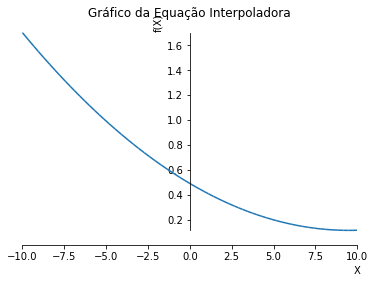

In [16]:
#GRAFICO DA FUNÇÃO INTERPOLADORA

s = plot(F, (x, min(x),max(x)),(y, min(y),max(y)), show=False)
s.title = 'Gráfico da Equação Interpoladora'
s.axis_center=(0,0)
s.autoscale=True
s.show() 

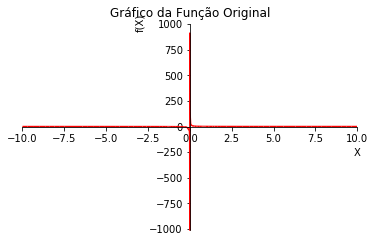

In [10]:
#GRAFICO DA FUNÇÃO ORIGINAL 
#CASO TENHA SIDO UTILIZADA A ENTRADA DE EQUAÇÃO, CASO CONTRÁRIO NÃO HÁ NADA PARA MOSTRAR AQUI

if EQouY == str("Y"):
   pass

else:
   s = plot(formula, (X, min(x),max(x)),(y, min(y),max(y)), show=False)
   s[0].line_color='r'
   s.title = 'Gráfico da Função Original'
   s.axis_center=(0,0)
   s.autoscale=True
   s.show()           


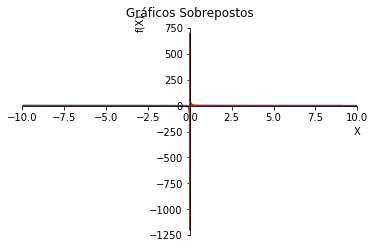

In [11]:
 #GRAFICO DAS FUNÇÕES SOBREPOSTAS:
    

s = plot(F, formula, (X, min(x),max(x)),(y, min(y),max(y)), show=False)   
s[1].line_color='r'
s.title = 'Gráficos Sobrepostos'
s.axis_center=(0,0)
s.autoscale=True
s.show()


# CÁLCULO DAS INTEGRAIS


In [12]:
# INTEGRAL INDEFINIDA DA FORMULA ORIGINAL

integral = integrate(formula, X)

if 'inf' in str(integral):
    print("ERRO! Não foi possível interpolar, verifique as entradas")
elif 'nan' in str(integral):
    print("ERRO! Não foi possível interpolar, verifique as entradas")
else:
    print("A integral indefinida é: "+str(integral))



A integral indefinida é: log(X)


In [33]:
 ## INTEGRAL DEFINIDA DA FORMULA ORIGINAL
    
xa = x[0:n]
integral = integrate(formula, (X, min(xa), max(xa)))

if 'inf' in str(integral):
    print("ERRO! Não foi possível interpolar, verifique as entradas")
elif 'nan' in str(integral):
    print("ERRO! Não foi possível interpolar, verifique as entradas")
else:
    print("A integral definida de " + str(formula)+ " entre os valores "+ str(min(xa)) + " e " + str(max(xa)) +" é: " +str(round(integral,4)))


A integral definida de 1/X entre os valores 5.0 e 8.0 é: 0.47


In [14]:
 ## INTEGRAL INDEFINIDA DA FUNÇÃO INTERPOLADORA

integral = integrate(F, X)

if 'inf' in str(integral):
    print("ERRO! Não foi possível interpolar, verifique as entradas")
elif 'nan' in str(integral):
    print("ERRO! Não foi possível interpolar, verifique as entradas")
else:
    int_arredondada = integral
    for a in preorder_traversal(integral):
        if isinstance(a, Float):
            int_arredondada = int_arredondada.subs(a, round(a, 4))
    print(str(int_arredondada))
  

0.0014*X**3 - 0.0396*X**2 + 0.4917*X


In [26]:
## INTEGRAL DEFINIDA DA FUNÇÃO INTERPOLADORA   

xa = x[0:n]
integral = integrate(F, (X, min(xa), max(xa)))

if 'inf' in str(integral):
    print("ERRO! Não foi possível interpolar, verifique as entradas")
elif 'nan' in str(integral):
    print("ERRO! Não foi possível interpolar, verifique as entradas")
else:
    print("A integral definida de " + str(F_arredondada) + " entre os valores " + str(min(xa)) + " e " + str(max(xa)) + " é: " + str(round(integral,4)))

A integral definida de 0.004*X**2 - 0.079*X + 0.492 entre os valores 5.0 e 8.0 é: 0.4688
